## 파일핸들링 &  os기본명령어

- Text 파일 생성

In [2]:
def write_txt(filepath):
    #텍스트 파일에 한줄씩 쓰기(writelines)
    count = 1
    data = []
    print('파일에 내용을 젖아하려면 내용을 입력하지 말고 [Enter]를 누르세요')
    
    while True:
        text = input('[%d]파일에 저장할 내용을 입력하세요: ' %count)
        if text == "":
            break
        data.append(text+'\n')
        count += 1
        
    f = open(filepath, 'w')
    f.writelines(data)
    f.close()
    
    ret= 'TEXT파일을 생성하였습니다.'
    
    return ret

In [3]:
filepath = './data/mydata.txt'
write_txt(filepath)

파일에 내용을 젖아하려면 내용을 입력하지 말고 [Enter]를 누르세요
[1]파일에 저장할 내용을 입력하세요: 안녕하세요,
[2]파일에 저장할 내용을 입력하세요: 반갑습니다.
[3]파일에 저장할 내용을 입력하세요: 화이팅
[4]파일에 저장할 내용을 입력하세요: 


'TEXT파일을 생성하였습니다.'

In [4]:
f= open(filepath, 'r')
data = f.read()
f.close()

print(data)

안녕하세요,
반갑습니다.
화이팅



### Text 파일 복사

In [8]:
#텍스트 파일 복사하기(read, write)
f = open('./data/mydata.txt', 'r')
h = open('./data/mydata_copy.txt', 'w')

data = f.read()
h.write(data)

h.close()
f.close()

In [10]:
with open('./data/mydata_copy.txt', 'r') as fp:
    data = fp.read()
    print(data)

안녕하세요,
반갑습니다.
화이팅



### Image파일 복사

In [11]:
from IPython.display import Image

origin_img = './images/wallpaper.png'
copied_img = './images/wallpaper_copy.png'

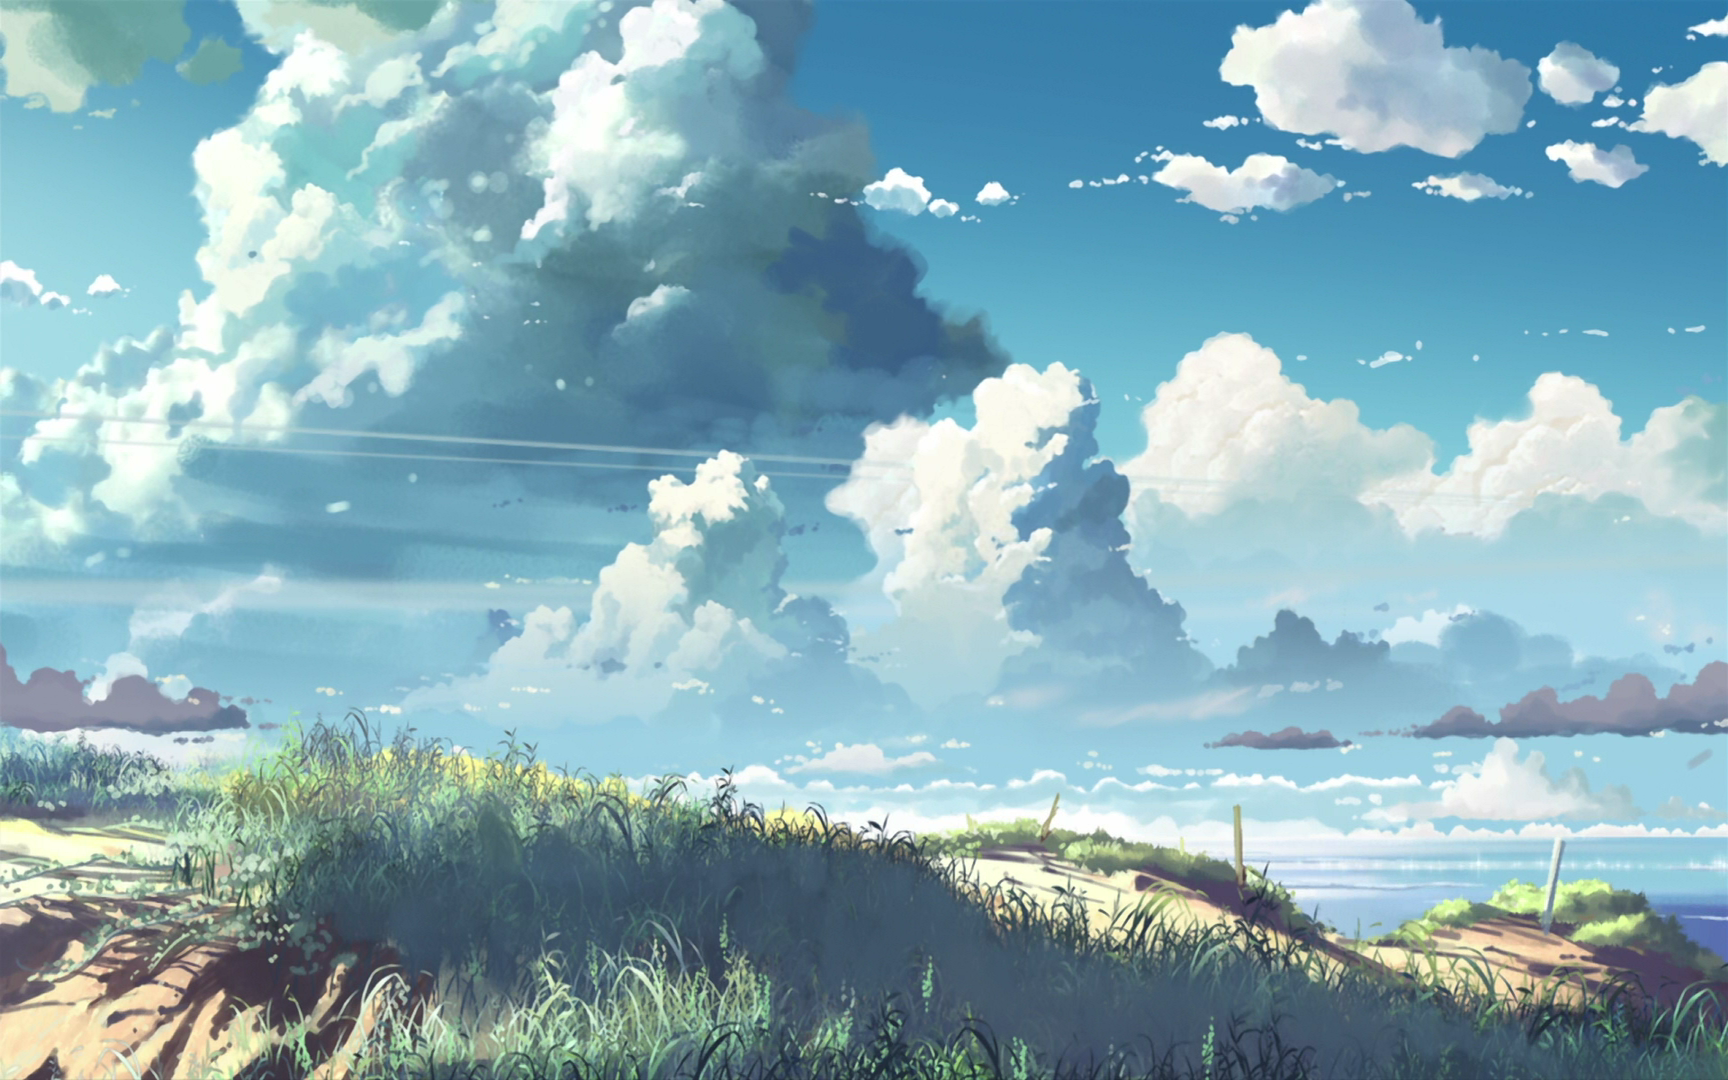

In [12]:
Image(origin_img)

In [13]:
#바이너리 파일 복사하기 (read, write)
bufsize = 1024
f = open(origin_img, 'rb')
h = open(copied_img, 'wb')

data = f.read(bufsize)
while data:
    h.write(data)
    data = f.read(bufsize)

h.close()
f.close()

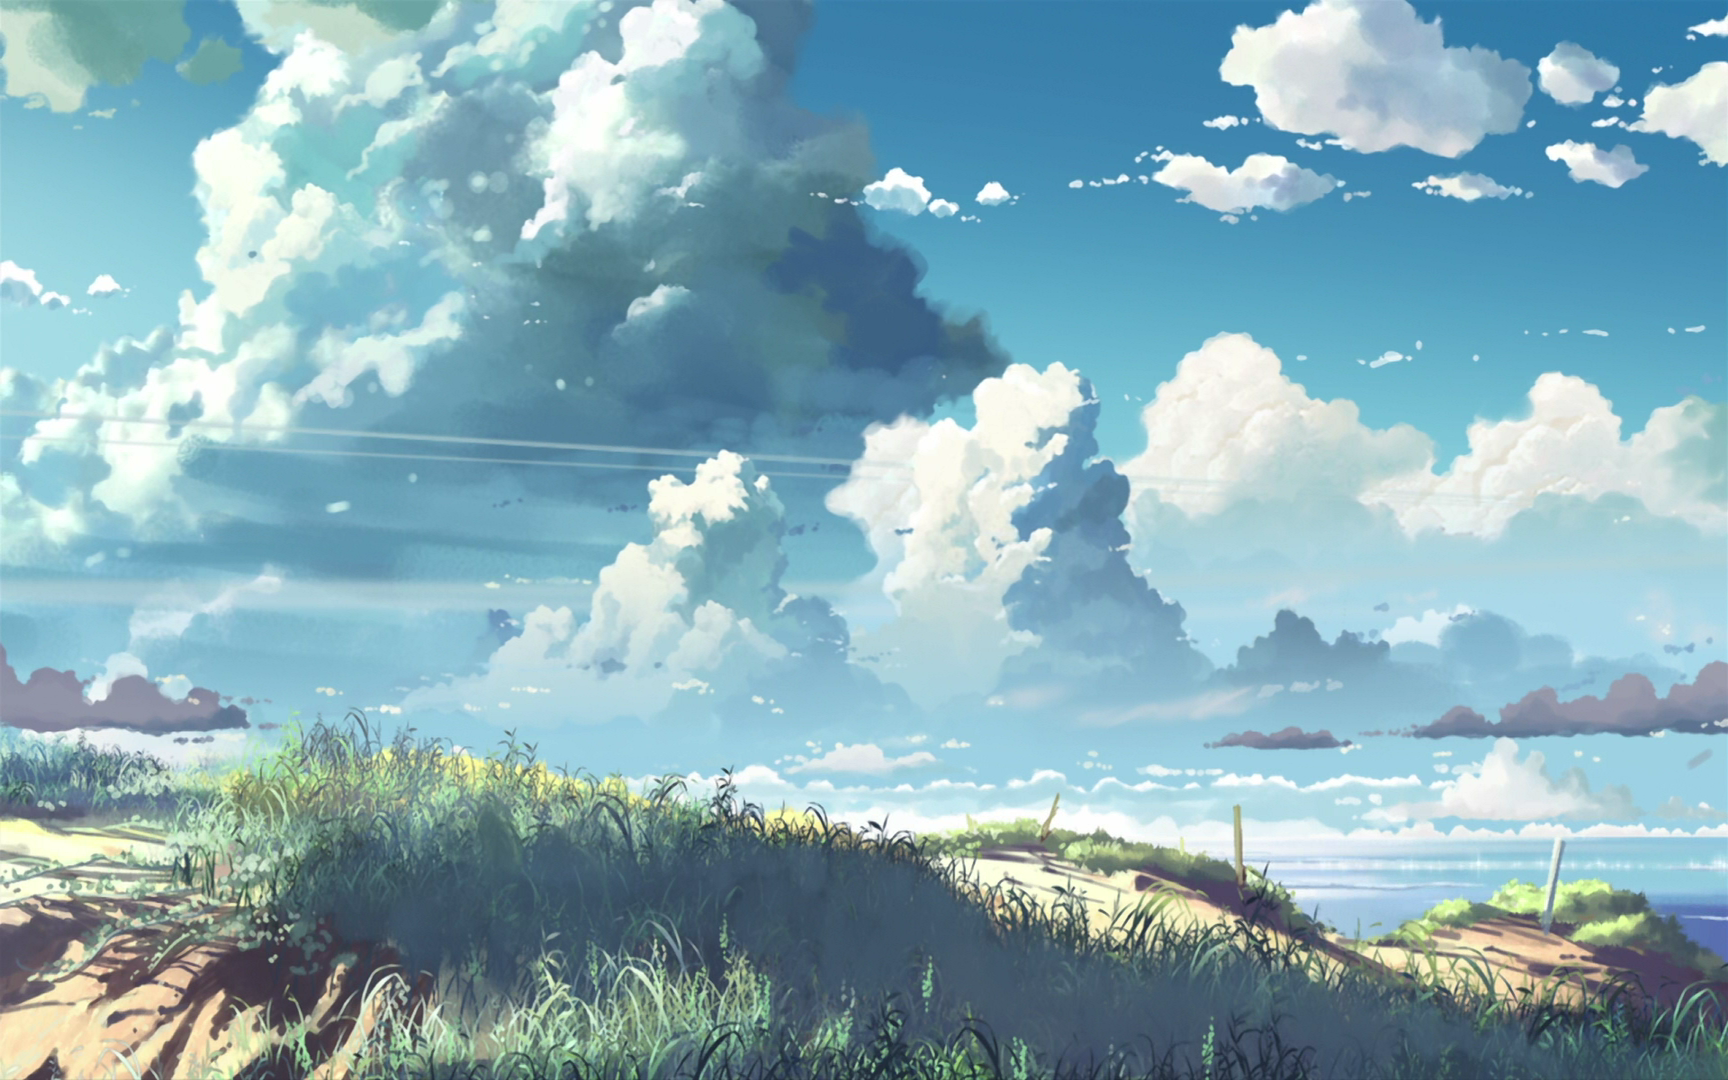

In [14]:
Image(copied_img)

## OS 기본명령어
### 파일크기 구하기(OSPATHGETSIZE)

In [15]:
#파일크기구하기(ospathgetsize)

from os.path import getsize

file1 = './data/mydata_copy.txt'
file2 = './images/wallpaper.png'

## directory 구분 할때 /를 쓰던지 \\를 쓰기. \하나만 쓰면 안된다.

file_size1 = getsize(file1)
file_size2 = getsize(file2)

print('File Name: %s \t File Size: %d Byte' %(file1, file_size1))
print('File Name: %s \t File Size: %d Byte' %(file2, file_size2))


File Name: ./data/mydata_copy.txt 	 File Size: 34 Byte
File Name: ./images/wallpaper.png 	 File Size: 2797186 Byte


### 파일 삭제하기(osremove)

In [17]:
#파일 삭제하기(osremove)

from os import remove

target_file = './data/mydata_copy.txt'
k = input('[%s] 파일을 삭제하겠습니까? ([y]/n)' %target_file)

if k == 'y' or k == '':
    remove(target_file)
    print('[%s] 파일을 삭제했습니다.' %target_file)

[./data/mydata_copy.txt] 파일을 삭제하겠습니까? ([y]/n)y
[./data/mydata_copy.txt] 파일을 삭제했습니다.


### 파일이름 바꾸기(osrename)

In [19]:
#파일이름 바꾸기(osrename)

from os import rename

folder_path = './data/'
target_file = folder_path + 'mydata.txt'
newname = input('[%s]에 대한 새로운 파일 이름을 입력하세요: ' %target_file)

#new_file = folder_path + newname

new_file = newname
rename(target_file, new_file)
print('[%s] -> [%s]로 파일 이름이 변경되었습니다.' %(target_file, new_file))

[./data/mydata.txt]에 대한 새로운 파일 이름을 입력하세요: yourdata.txt
[./data/mydata.txt] -> [yourdata.txt]로 파일 이름이 변경되었습니다.


In [20]:
### 파일을 다른 디렉터리로 이동하기(osrename)


from os import rename

#target_file = 'yourdata.txt'
target_file = new_file
newpath = input('[%s]를 이동할 디렉터리의 절대경로를 입력하세요: ' %target_file)

if newpath[-1] == '/':
    newname = newpath + target_file
else:
    newname = newpath + '/' + target_file

try:
    rename(target_file, newname)
    print('[%s] -> [%s]로 이동되었습니다.' %(target_file, newname))
except FileNotFoundError as e:
    print(e)

[yourdata.txt]를 이동할 디렉터리의 절대경로를 입력하세요: /Temp
[yourdata.txt] -> [/Temp/yourdata.txt]로 이동되었습니다.


### 디렉터리에 있는 파일 목록 얻기 (os.listdir, glob.glob)

In [21]:
#디렉터리에 있는 파일목록 얻기(os.listdir, glob.glob)
import os, glob

#folder = 'E:/devlab'
folder = 'data'
file_list1 = os.listdir(folder)
print(file_list1)

#files = '*.txt'
files = 'data/*txt'
file_list2 = glob.glob(files)
print(file_list2)

['.ipynb_checkpoints', 'company.csv', 'hello.txt', 'students.csv', 'subject.txt']
['data\\hello.txt', 'data\\subject.txt']


In [22]:
### 현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir)

#현재 디렉터리 확인하고 바꾸기(os.getcwd, os.chdir)

import os

pdir = os.getcwd(); print(pdir)
os.chdir('data'); print(os.getcwd())
os.chdir(".."); print(os.getcwd())
os.chdir(pdir); print(os.getcwd())

C:\Users\LGULTRA\anaconda_src
C:\Users\LGULTRA\anaconda_src\data
C:\Users\LGULTRA\anaconda_src
C:\Users\LGULTRA\anaconda_src


### 디렉터리 생성하기(osmkdir)

In [23]:
#디렉터리 생성하기(osmkdir)
import os

newfolder = input('새로 생성할 디렉터리 이름을 입력하세요: ')

try:
    os.mkdir(newfolder)
    print('[%s] 디렉터리를 새로 생성했습니다.' %newfolder)
except Exception as e:
    print(e)

새로 생성할 디렉터리 이름을 입력하세요: atemp
[atemp] 디렉터리를 새로 생성했습니다.


### 디렉터리 제거하기 (osrmdir)

In [25]:
#디렉터리 제거하기(osrmdir)

import os

target_folder = newfolder
k = input('[%s]디렉터리를 삭제하겠습니까? (y/n)' %target_folder)
if k == 'y':
    try:
        os.rmdir(target_folder)
        print('[%s]디렉터리를 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)

[atemp]디렉터리를 삭제하겠습니까? (y/n)y
[atemp]디렉터리를 삭제했습니다.


### 하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree)

In [27]:
#하위 디렉터리 및 파일 전체 삭제하기(shutil.rmtree)

import shutil
import os

target_folder = 'E:/devlab/tmp'
print('[%s]하위 모든 디렉터리를 및 파일들을 삭제합니다.' %target_folder)

for file in os.listdir(target_folder):
    print(file)
    
k = input('[%s]를 삭제하겠습니까? (y/n)' %target_folder)

if k == 'y':
    try:
        shutil.rmtree(target_folder)
        print('[%s]의 모든 하위 디렉터리를 및 파일들을 삭제했습니다.' %target_folder)
    except Exception as e:
        print(e)

[E:/devlab/tmp]하위 모든 디렉터리를 및 파일들을 삭제합니다.


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'E:/devlab/tmp'

### 파일이 존재하는지 체크하기(os.pathexists)

In [30]:
#파일이 존재하는지 체크하기(os.pathexists)
import os
from os.path import exists

dir_name = input('새로 생성할 디렉터리 이름을 입력하세요: ')

if not exists(dir_name):
    os.mkdir(dir_name)
    print('[%s] 디렉터리를 생성했습니다.' %dir_name)
else:
    print('[%s]는 이미 존재합니다.' %dir_name)

새로 생성할 디렉터리 이름을 입력하세요: E:/devlab/tmp


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'E:/devlab/tmp'